# <center><font> Tutorial #2 Computer- and robot-assisted surgery</font></center>
## <center><font> Computer Vision Basics I</font></center>
<center>&copy; Sebastian Bodenstedt, National Center for Tumor Diseases (NCT) Dresden<br>
    <a href="https://www.nct-dresden.de/"><img src="https://www.nct-dresden.de/++theme++nct/images/logo-nct-en.svg"></a> </center>

## <center><font>Preperation</font></center>

For this tutorial, we will utilize the OpenCV, Matplotlib and NumPy:

In [ ]:
# Install numpy, opencv and matplot-lib pip packages into the current Jupyter kernel
import sys

In [1]:
import cv2
import numpy as np
# Force Matplotlib to display data directly in Jupyter
%matplotlib inline 
from matplotlib import pyplot as plt

## <center><font color=navy>Review</font></center>
We can utilize OpenCV to read one of the images from HD and NumPy to process the data.

In [2]:
img = cv2.imread("Exercises/Exercise1/img_01_raw.png") # Read image from HD

We can then visualize images with Matplotlib.

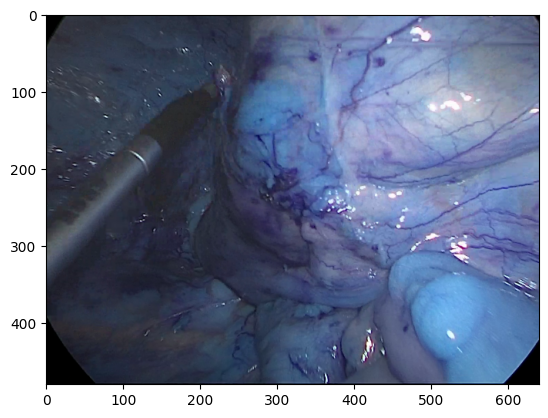

In [3]:
plt.imshow(img) # Display image

The result looks off, as OpenCV uses BGR color format, Matplot uses RGB. We therefore have to convert the result first:

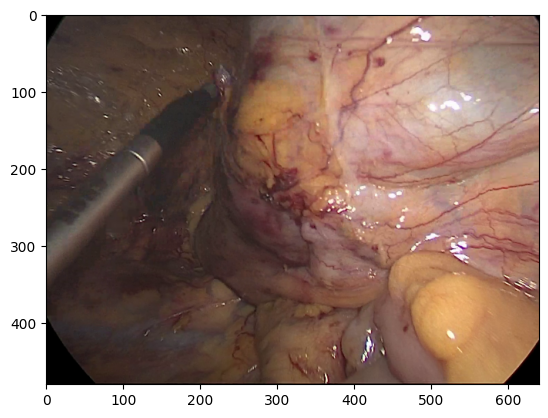

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB

plt.imshow(img_rgb) # Display result

A lot of the methods introduced in the lecture are more easily applied to grayscale images, we can also use OpenCV to convert BGR to Grayscale:

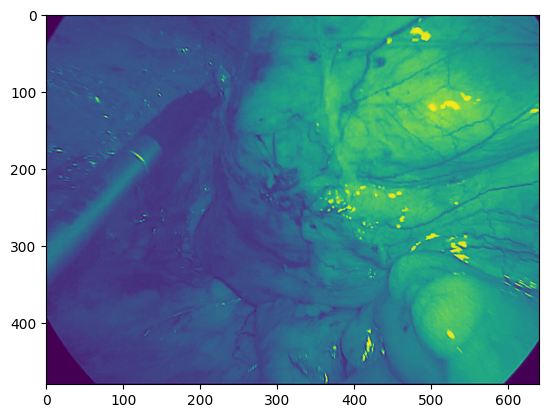

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert BGR to grayscale

plt.imshow(img_gray) # Display result

For single channel images, a mapping to grayscale needs to be specified:

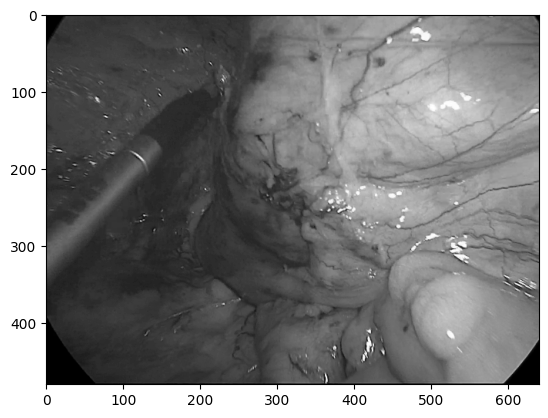

In [6]:
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255) # Display results

As we will need this function regularly, we define a briefer alias:

In [7]:
def show_gray(img, canvas=plt): # Later we want to draw on a different underground, so we define this as a parameter
    canvas.imshow(img, cmap='gray', vmin=0, vmax=255)

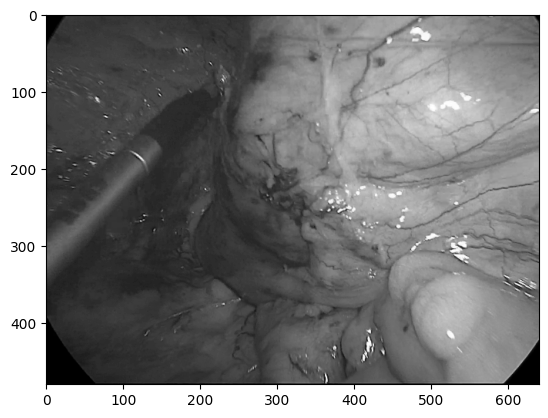

In [8]:
show_gray(img_gray) # Use Alias

## <center><font color=navy>Histograms</font></center>
One metrics for describing images is the histogram. We can easily compute histograms using Numpy:

In [9]:
num_values = 256 # Number of values to consider. For 8-bit 256 values are possible

histogram = np.zeros(num_values, dtype=np.int64) # Initialize histogram with zeros

In [10]:
for i in range(num_values): # Iterate over all possible values
    histogram[i] = np.sum(img_gray == i) # Count occurences in data

In [11]:
print(histogram)

[3771  214   56   31   38   31   21   24   18   17   25   37   22   31
   31   31   42   30   28   26   45   57   38   32   31   42   37   43
   48   76   89  151  218  261  198  525  928 1215 1421 2023 2079 1503
 2458 3958 4336 4575 4683 3733 2051 3326 4195 4501 4520 4607 4047 2286
 3936 4745 4582 4346 4421 3626 2170 3583 4301 4565 4579 4327 3166 1821
 2603 2791 2722 2374 1976 1433  959 1263 1389 1364 1321 1232 1017  795
 1050 1275 1333 1453 1401 1392 1112  845 1184 1402 1409 1457 1362 1163
  816 1193 1460 1418 1411 1472 1167  875 1180 1341 1416 1408 1369 1121
  783 1142 1241 1241 1286 1289 1041  873 1049 1336 1382 1398 1400 1231
 1050 1397 1767 1989 1984 2017 1689 1207 1644 1987 2276 2378 2252 2104
 1510 2024 2433 2481 2451 2406 2060 1445 1995 2407 2357 2386 2377 2114
 1377 1917 2155 2067 1957 1845 1657 1068 1472 1631 1642 1623 1567 1239
  872 1106 1240 1267 1301 1282 1262 1123  814 1081 1236 1278 1181 1110
  874  581  826  926  877  757  628  500  326  427  462  508  488  431
  276 

The histogram can be more easily interpreted as a plot:

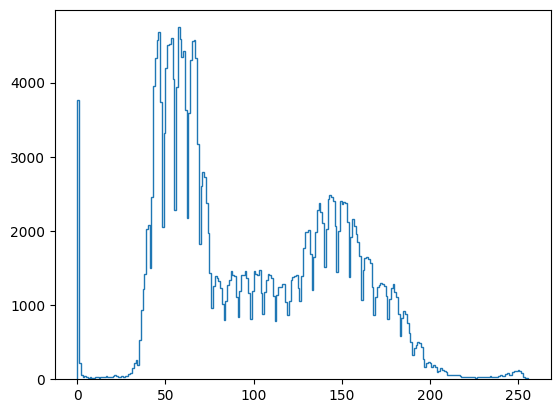

In [12]:
plt.stairs(histogram) # Plot as stairs diagram

Generally histograms are normalized:

Sum 1.0


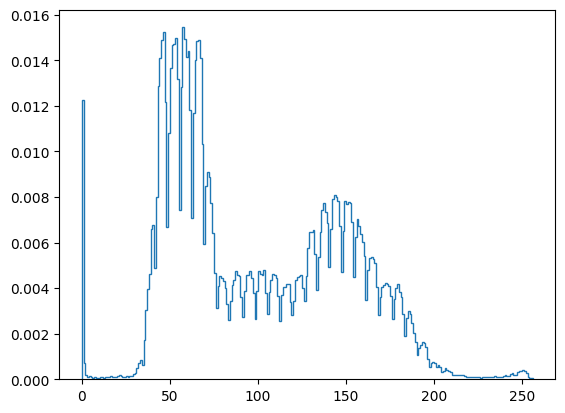

In [13]:
normalized_histogram = histogram/(img_gray.shape[0]*img_gray.shape[1]) # Normalize histogram

plt.stairs(normalized_histogram)
print("Sum", np.sum(normalized_histogram))

Alternatively, OpenCV also provides a (probably faster) function for computing histograms:

(256, 1)


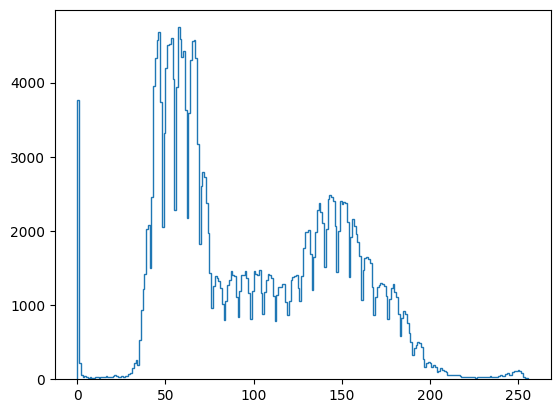

In [14]:
hist = cv2.calcHist([img_gray],[0],None,[256],[0,256]) # Calculate histogram using OpenCV
print(hist.shape) # See shape
hist = hist.reshape(-1) # Modify shape
plt.stairs(hist)

Let's combine this into one function:

In [15]:
def calc_histogram(image):
    num_values = 256 # Number of values to consider. For 8-bit 256 values are possible

    histogram = np.zeros(num_values, dtype=np.int64) # Initialize histogram with zeros
    #TODO
    return histogram

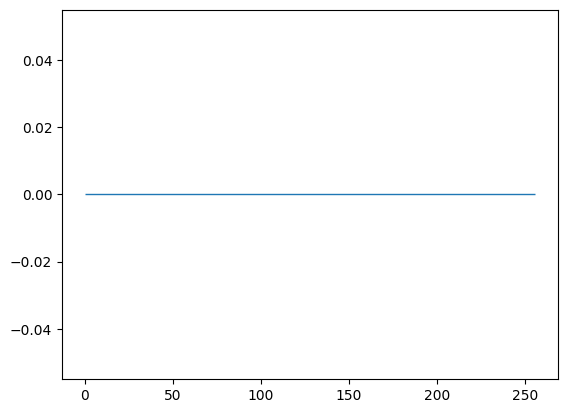

In [16]:
h = calc_histogram(img_gray)
plt.stairs(h)

Let's load a different image and take a look at its histogram:

In [18]:
img_ct = cv2.imread("Exercises/Exercise1/ct1.png")
img_ct = cv2.cvtColor(img_ct, cv2.COLOR_BGR2GRAY)

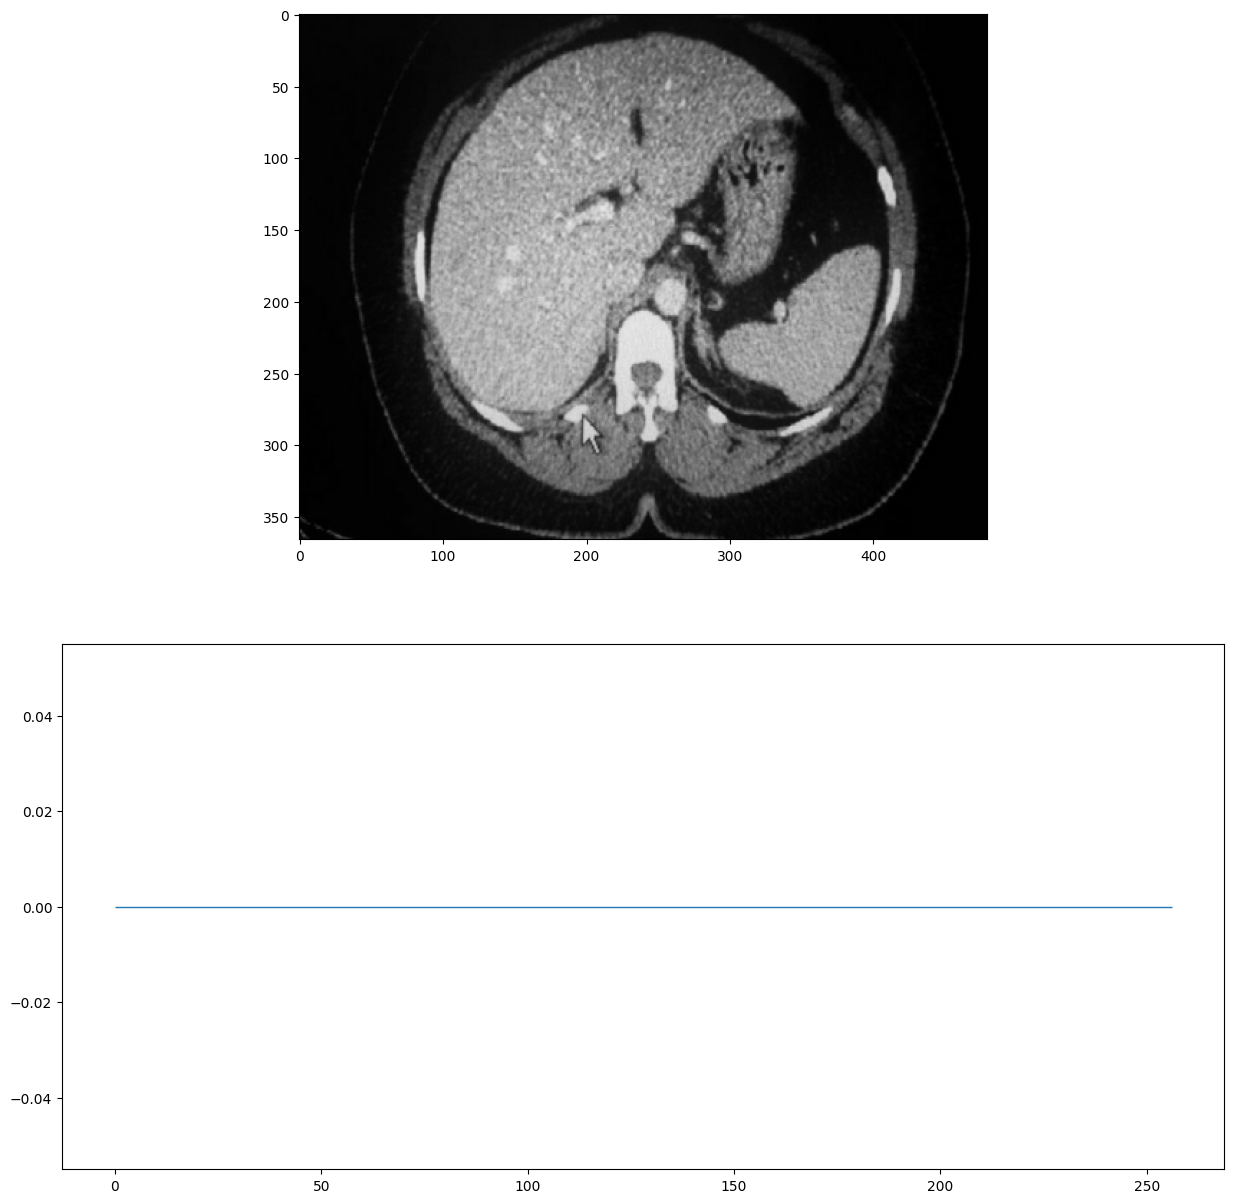

In [19]:
figure, axis = plt.subplots(2, 1, figsize=(15, 15)) # subplots let you visualize multiple outputs simultanously

show_gray(img_ct, axis[0]) # the axis can be used identically to plt before

h = calc_histogram(img_ct)
axis[1].stairs(h)

We can also calculate a histogram of each channel of an RGB-image and combine them:

NameError: name 'h_r' is not defined

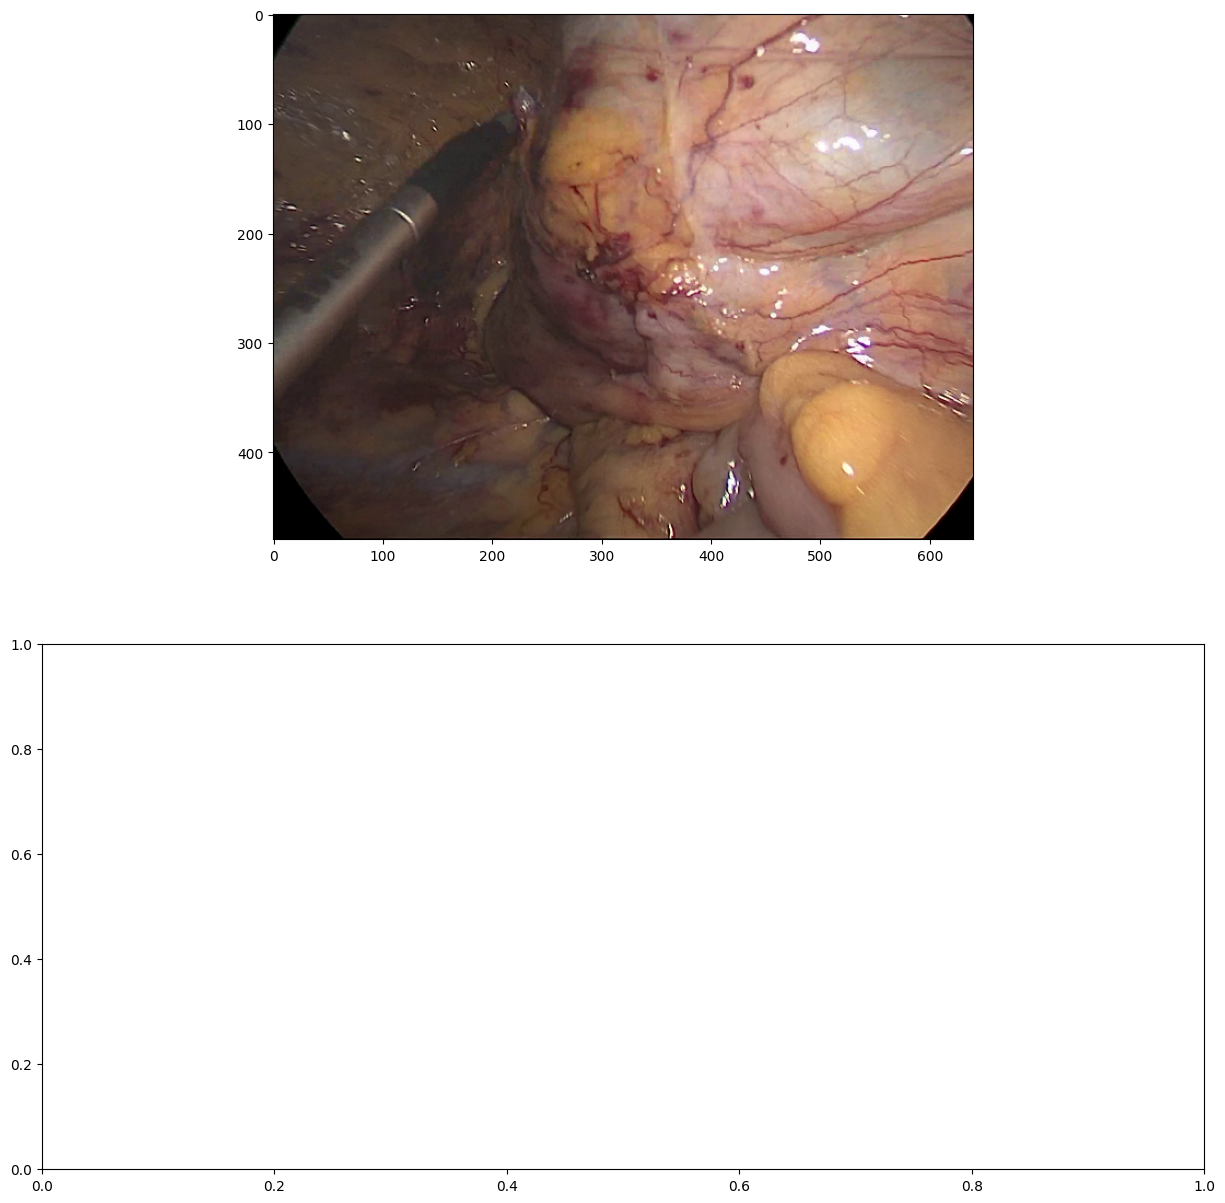

In [20]:
# Calculate the histogram per channel

#TODO
figure, axis = plt.subplots(2, 1, figsize=(15, 15))

axis[0].imshow(img_rgb)

axis[1].stairs(h_r, color="r")
axis[1].stairs(h_g, color="g")
axis[1].stairs(h_b, color="b")

## <center><font color=navy>Point operations</font></center>
Point operations modify the value of a pixel, considering only its position and value, no other context, e.g.:

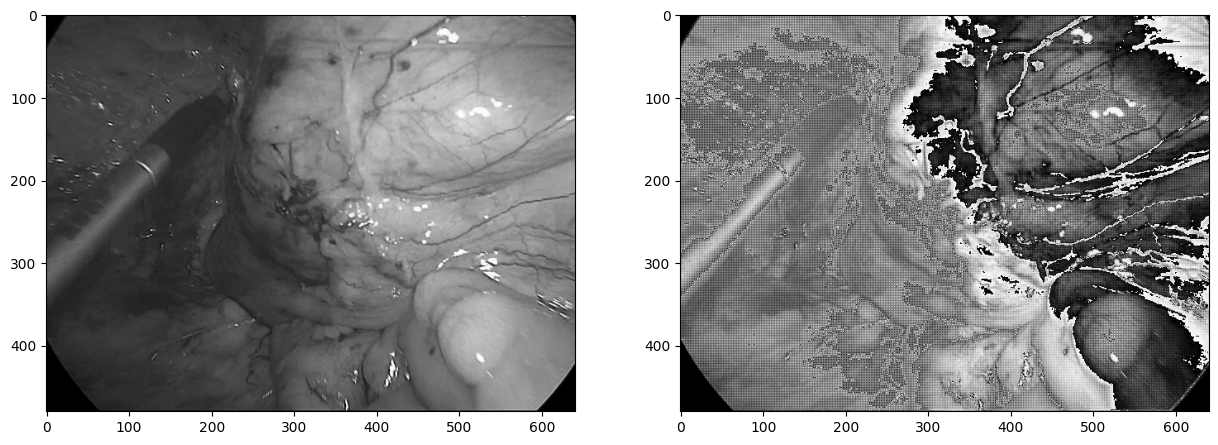

In [ ]:
def point_operation(image):
    img_out = np.copy(image)
    
    pos_x = np.arange(image.shape[1]).reshape(1, -1)
    pos_y = np.arange(image.shape[0]).reshape(-1, 1)
    
    pos_xy = pos_x * pos_y
    
    ind = pos_xy % 2 == 0
    img_out[ind]*= 2
    img_out[np.logical_not(ind)]*= 4
    
    return img_out

img_out = point_operation(img_gray)

figure, axis = plt.subplots(1, 2, figsize=(15, 15))

show_gray(img_gray, axis[0])
show_gray(img_out, axis[1])

Homogeneous transformations only consider the value of a pixel, e.g. affine transformations:

In [ ]:
def affine_operation(image, a, b):
    #TODO
    
    return img_out

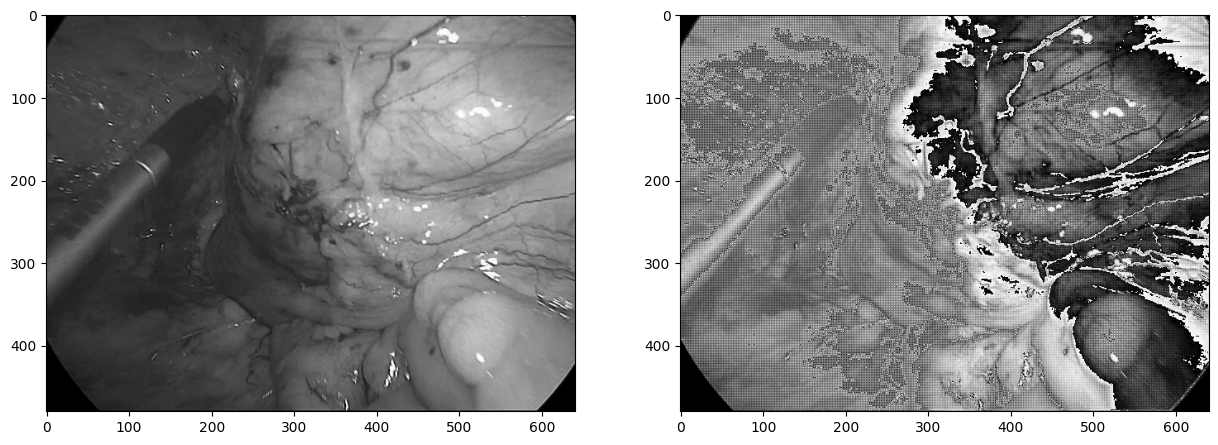

In [ ]:
figure, axis = plt.subplots(1, 2, figsize=(15, 15))

img_res = affine_operation(img_gray, -1, 255)

show_gray(img_gray, axis[0])
show_gray(img_res, axis[1])

### <center><font color=navy>Histogram Spread</font></center>
Simple operation for increasing the contrast in a given image:

In [ ]:
def histogram_spread(image):
    #TODO
    
    return affine_operation(image, a, b)

In [ ]:
img_ct_res = histogram_spread(img_ct)

figure, axis = plt.subplots(2, 2, figsize=(15, 15))

show_gray(img_ct, axis[0, 0])
show_gray(img_ct_res, axis[0, 1])

h_ct = calc_histogram(img_ct)
h_ct_res = calc_histogram(img_ct_res)

axis[1, 0].stairs(h_ct)
axis[1, 1].stairs(h_ct_res)


NameError: name 'a' is not defined

### <center><font color=navy>Histogram Stretch</font></center>
Improved operation for increasing the contrast in a given image:

In [ ]:
def histogram_stretch(image, p_min=0.1, p_max=0.9):
    #TODO
    
    return affine_operation(image, a, b)

In [ ]:
img_ct_res = histogram_stretch(img_ct)

figure, axis = plt.subplots(2, 2, figsize=(15, 15))

show_gray(img_ct, axis[0, 0])
show_gray(img_ct_res, axis[0, 1])

h_ct = calc_histogram(img_ct)
h_ct_res = calc_histogram(img_ct_res)

axis[1, 0].stairs(h_ct)
axis[1, 1].stairs(h_ct_res)

### <center><font color=navy>Histogram equalization</font></center>
Further improved operation for increasing the contrast in a given image:

In [ ]:
def histogram_equalization(image):
    #TODO
    
    return img_out

In [ ]:
img_ct_res = histogram_equalization(img_ct)

figure, axis = plt.subplots(2, 2, figsize=(15, 15))

show_gray(img_ct, axis[0, 0])
show_gray(img_ct_res, axis[0, 1])

h_ct = calc_histogram(img_ct)
h_ct_res = calc_histogram(img_ct_res)

axis[1, 0].stairs(h_ct)
axis[1, 1].stairs(h_ct_res)

### <center><font color=navy>Color images</font></center>
These techniques can of course also be applied to color images:

In [ ]:
color_out = np.copy(img_rgb)

#TODO

figure, axis = plt.subplots(1, 2, figsize=(15, 15))

axis[0].imshow(img_rgb)
axis[1].imshow(color_out)

In [ ]:
color_out = np.copy(img_rgb)

#TODO

figure, axis = plt.subplots(1, 2, figsize=(15, 15))

axis[0].imshow(img_rgb)
axis[1].imshow(color_out)

In [ ]:
color_out = np.copy(img_rgb)

#TODO

figure, axis = plt.subplots(1, 2, figsize=(15, 15))

axis[0].imshow(img_rgb)
axis[1].imshow(color_out)